#Importing Libraries

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

#Loading Dataset

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


68606236/68606236 [==============================] - 1s 0us/step


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

#Number of images in our dataset

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


#Defining BatchSize and Epochs

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


#Image Generator

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
train_data_gen

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)


#Ploting Images

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


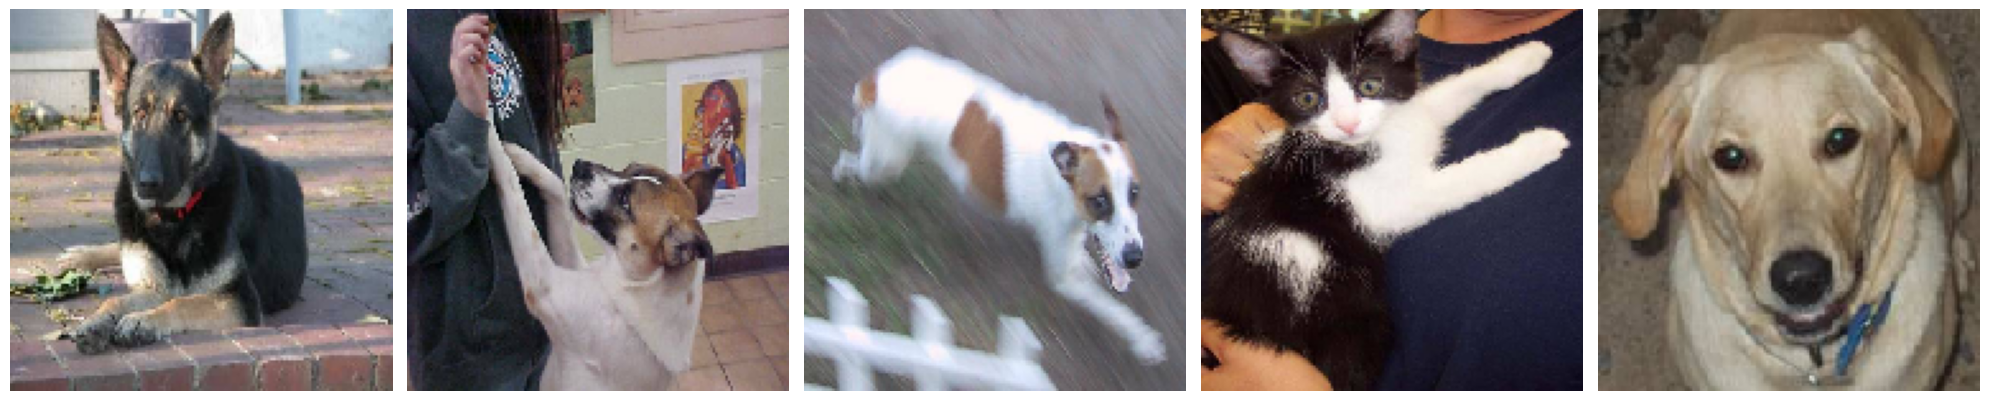

In [ ]:
plotImages(sample_training_images[10:20])


#Model

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

#Model Fitting

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


<ipython-input-18-01c6f78f4d4f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
15/15 [==============================] - 62s 4s/step - loss: 0.9802 - accuracy: 0.5016 - val_loss: 0.6953 - val_accuracy: 0.5123
Epoch 2/15
15/15 [==============================] - 55s 4s/step - loss: 0.6927 - accuracy: 0.4963 - val_loss: 0.6906 - val_accuracy: 0.5033
Epoch 3/15
15/15 [==============================] - 54s 4s/step - loss: 0.6830 - accuracy: 0.4973 - val_loss: 0.6680 - val_accuracy: 0.5290
Epoch 4/15
15/15 [==============================] - 54s 4s/step - loss: 0.6402 - accuracy: 0.5881 - val_loss: 0.6103 - val_accuracy: 0.6138
Epoch 5/15
15/15 [==============================] - 55s 4s/step - loss: 0.5867 - accuracy: 0.6501 - val_loss: 0.5624 - val_accuracy: 0.6786
Epoch 6/15
15/15 [==============================] - 55s 4s/step - loss: 0.5476 - accuracy: 0.7003 - val_loss: 0.5592 - val_accuracy: 0.6975
Epoch 7/15
15/15 [==============================] - 55s 4s/step - loss: 0.4977 - accuracy: 0.7532 - val_loss: 0.5413 - val_accuracy: 0.7232
Epoch 8/15
15/15 [==

#Model Accuracy and Loss

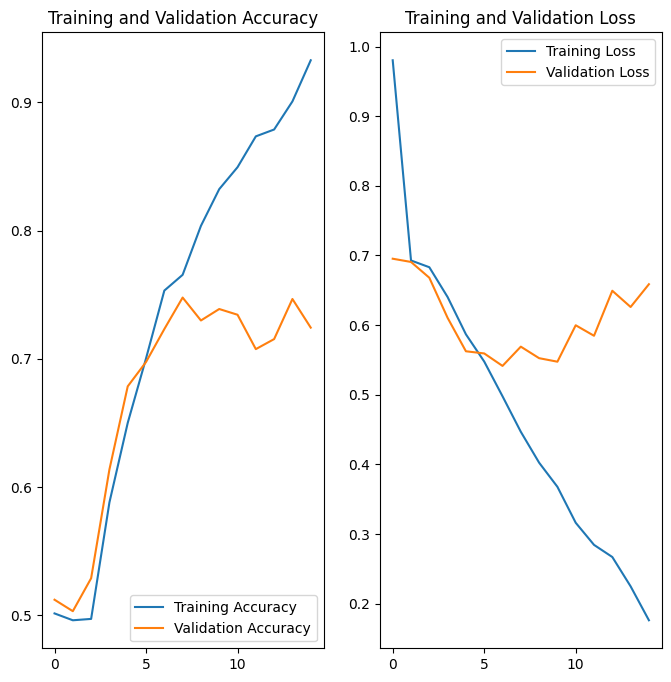

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
image_gen

#Printing Accuracy

In [ ]:
print(acc)

[0.5016025900840759, 0.4962606728076935, 0.49732905626296997, 0.5881410241127014, 0.6501068472862244, 0.7003205418586731, 0.7532051205635071, 0.7654914259910583, 0.8036458492279053, 0.8322649598121643, 0.8493589758872986, 0.8733974099159241, 0.8787392973899841, 0.9006410241127014, 0.932692289352417]


#As our model didn't well trained so we are retraining our model again because of similarities of cats and dogs for some images

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 2000 images belonging to 2 classes.


#Augmented images

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]


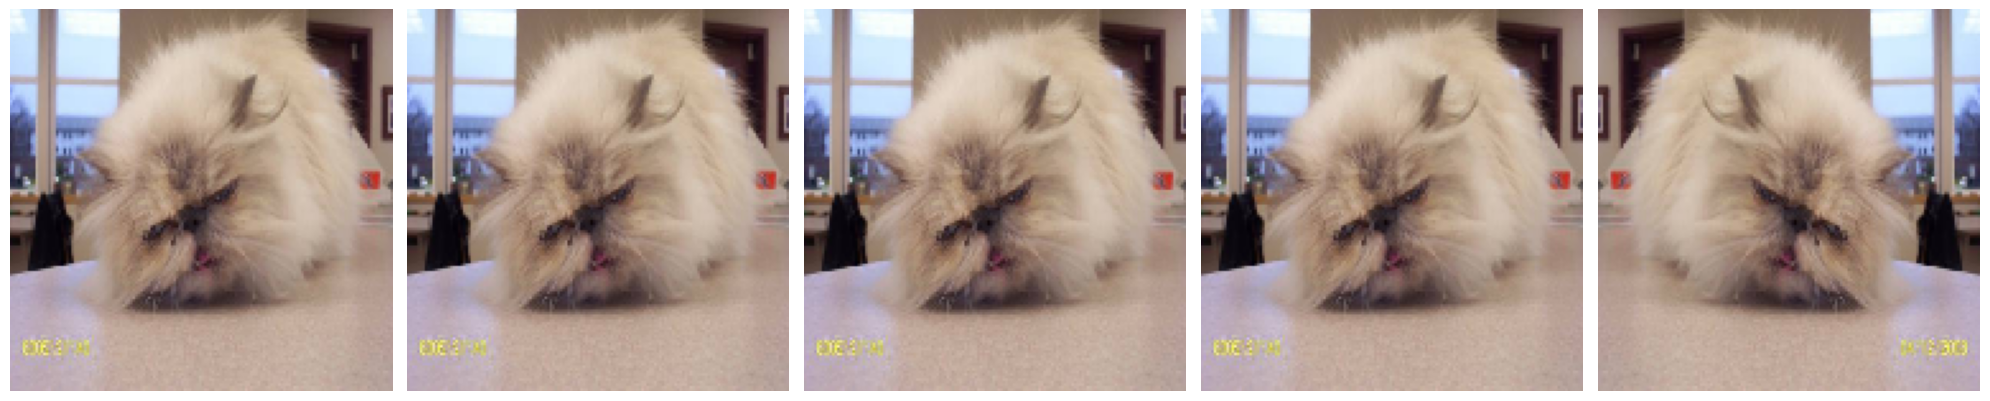

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


#Augmented images of cats

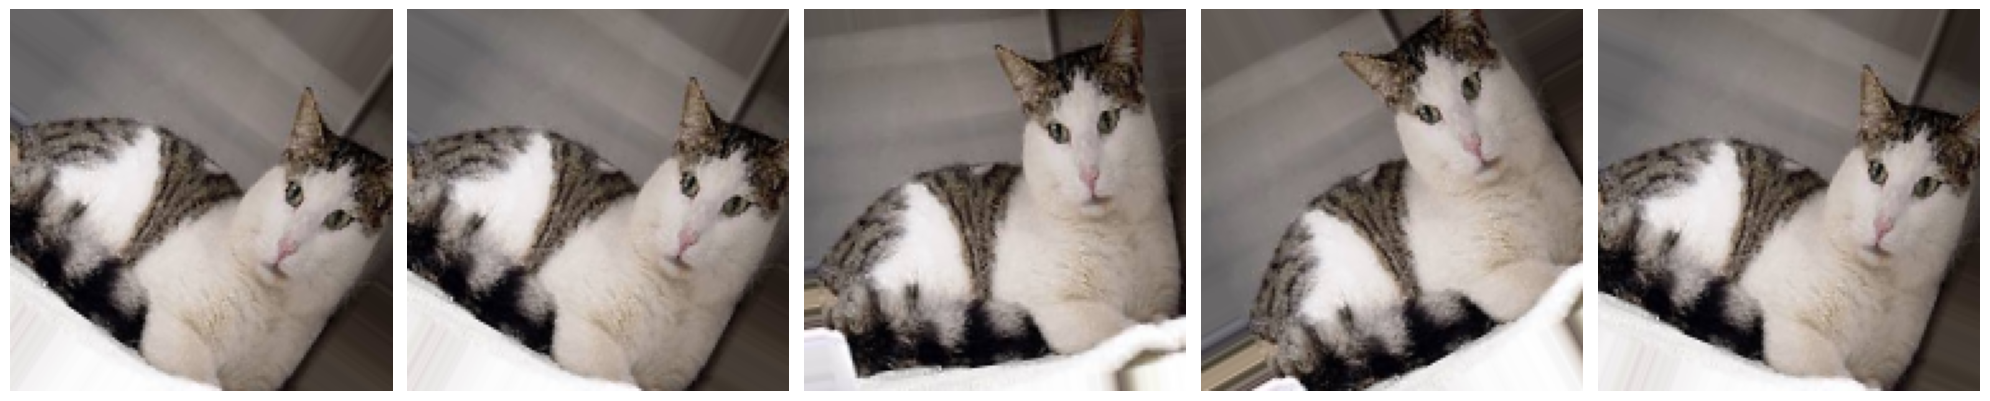

In [ ]:
plotImages(augmented_images)


# zoom_range from 0 - 1 where 1 = 100%.

In [ ]:

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) #


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


#Augmented images of Dog

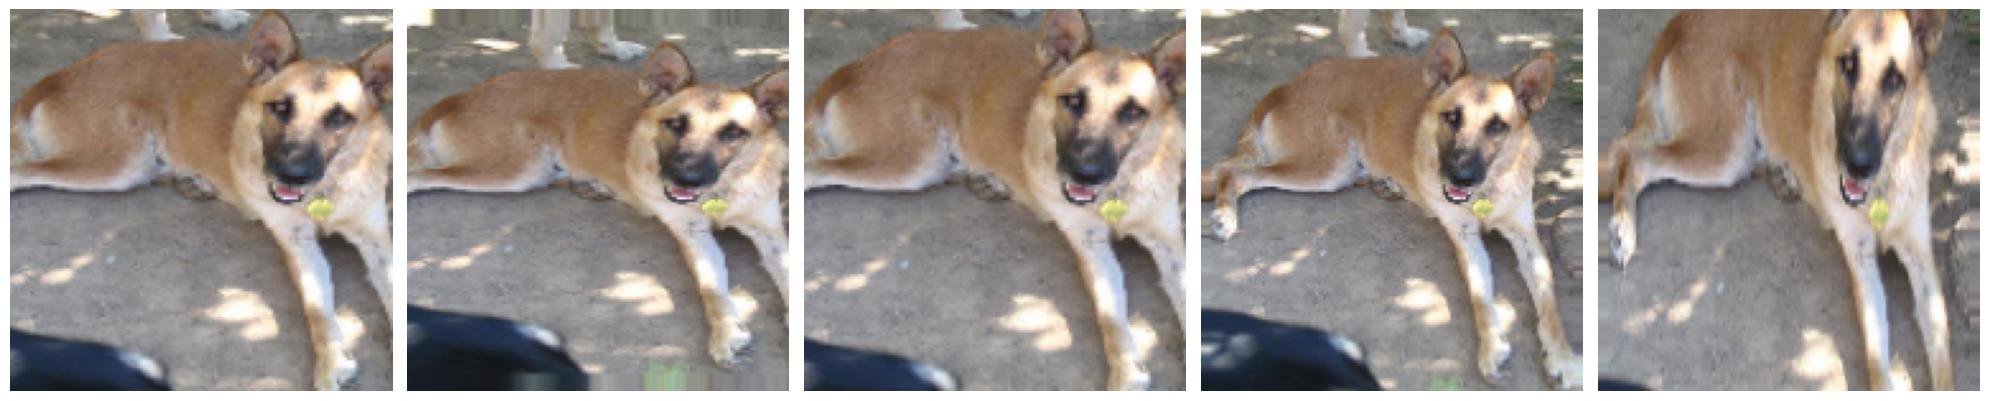

In [ ]:
plotImages(augmented_images)


In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


#Dog image from different scope

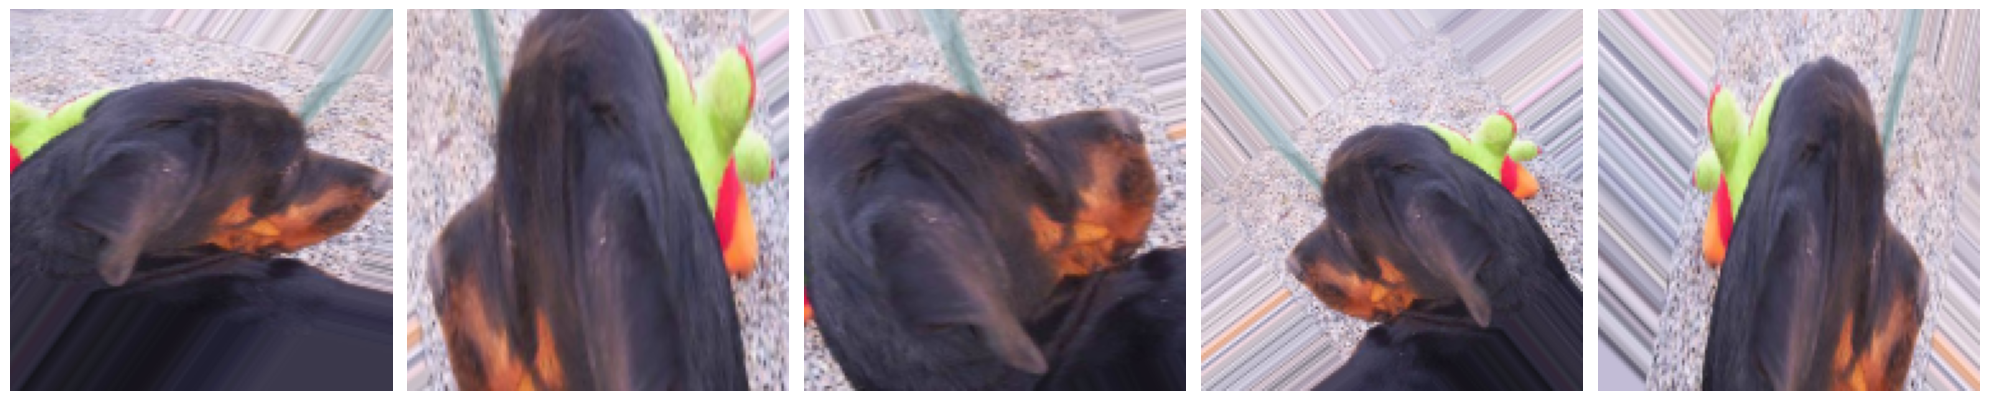

In [ ]:

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)


#Validating data of our image generation

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


#Retraining our CNN Model

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

#Model Fitting

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


<ipython-input-42-2401ab36538a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_new.fit_generator(


Epoch 1/15
15/15 [==============================] - 69s 4s/step - loss: 1.1649 - accuracy: 0.5192 - val_loss: 0.6943 - val_accuracy: 0.5045
Epoch 2/15
15/15 [==============================] - 67s 4s/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 3/15
15/15 [==============================] - 66s 4s/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 4/15
15/15 [==============================] - 66s 4s/step - loss: 0.6925 - accuracy: 0.4963 - val_loss: 0.6890 - val_accuracy: 0.5033
Epoch 5/15
15/15 [==============================] - 67s 4s/step - loss: 0.6921 - accuracy: 0.5011 - val_loss: 0.6909 - val_accuracy: 0.5179
Epoch 6/15
15/15 [==============================] - 67s 4s/step - loss: 0.6910 - accuracy: 0.5011 - val_loss: 0.6856 - val_accuracy: 0.5045
Epoch 7/15
15/15 [==============================] - 66s 4s/step - loss: 0.6880 - accuracy: 0.5021 - val_loss: 0.6853 - val_accuracy: 0.4933
Epoch 8/15
15/15 [==

#Re-Trained Accuracy and Loss

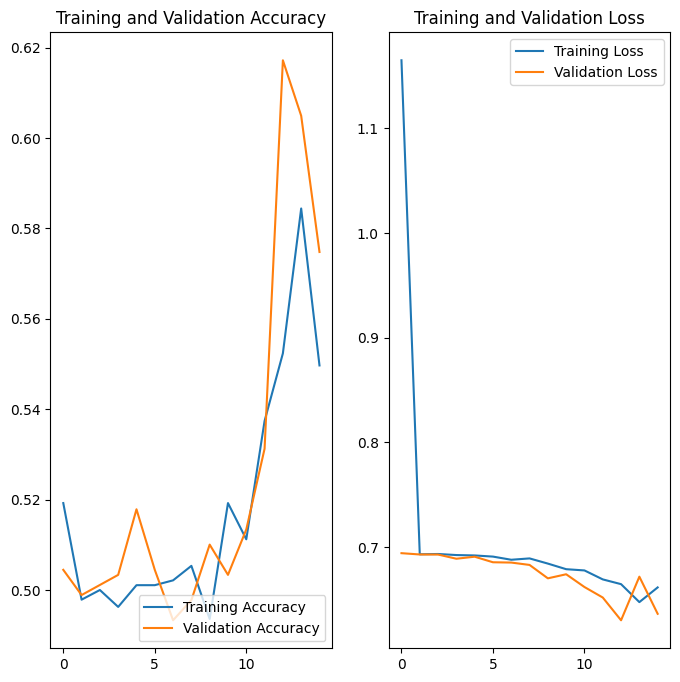

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
print(acc)

[0.5192307829856873, 0.497863233089447, 0.5, 0.4962606728076935, 0.5010683536529541, 0.5010683536529541, 0.502136766910553, 0.5053418874740601, 0.49358972907066345, 0.5192307829856873, 0.5112179517745972, 0.5373931527137756, 0.5523504018783569, 0.5844017267227173, 0.5496794581413269]
